<a href="https://colab.research.google.com/github/hmarathe420/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe      


# **Project Summary -**

As a Data Scientist Trainee at Almabetter, I developed a sophisticated Book Recommendation System to enhance the reading experience for users by providing personalized book suggestions based on their preferences and reading history. This project aimed to tackle the challenge of information overload and guide users towards discovering books that align with their interests.


**What I Did:**

* Collecting and Cleaning Data: I gathered information about many different books, like their genres, authors, and how much people liked them. I made sure the data was accurate and ready to use.

* Finding Similar Readers: I figured out who likes similar kinds of books. If you enjoy books similar to someone else, you'll get recommendations they liked.

* Matching Book Traits: I looked at what makes a book special, like its genre and who wrote it. This helped me suggest books that match what you already enjoy.

* Smart Math Stuff: I used some smart math tricks to understand patterns in the data. This made the recommendations even more accurate.

* Trying Different Ideas: I tested different ideas to make sure the suggestions were as good as possible. This included trying out different ways of predicting what books you might like.

**How It Works:**

* You tell the system about some books you like.
* The system uses its math tricks to find books similar to the ones you like.
* It also looks at the traits of the books to find others that you might enjoy.
* Finally, it suggests these books to you so you can have more great reading experiences.

**What's Next:**
This project is just the beginning. In the future, we could make the system even smarter by understanding book content better or getting feedback from users like you. We might also make it easier to use by creating a simple website where you can get recommendations with just a few clicks.

I'm excited to share this project with you, and I'm looking forward to seeing how it can help people discover fantastic books they might have missed otherwise.

# **GitHub Link -**

**GitHub Link -->**   [Click Here](https://github.com/hmarathe420/Book_Recommendation_System)

# **Problem Statement**


**During the last few decades, with the rise of Youtube, Amazon, Netflix, and
many other such web services, recommender systems have taken more and
more place in our lives. From e-commerce (suggest to buyers articles that
could interest them) to online advertisement (suggest to users the right
contents, matching their preferences), recommender systems are today
unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to watch, text to read, products to buy, or
anything else depending on industries). Recommender systems are really
critical in some industries as they can generate a huge amount of income
when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system
for users.**

# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

### Dataset Loading

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading book, user and rating dataset from the drive
book_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Books.csv")
user_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Users.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/Book Recommendation  System/Ratings.csv")

### Dataset First View

In [4]:
# book_df first look
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# User_df first look
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# rating_df first look
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# printin the shape of our datasets
print(user_df.shape)
print(rating_df.shape)
print(book_df.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


**From the above we get to know that the user_df and rating_df has common column which is user_id. Similarly in rating_df and book_df also has common column which is ISBN so based on user_id column we can join user_df and rating_df and make single dataset called user_rating_df and based on ISBN column we can inner join user_rating_df and book_df and make single df containing three dataset called as full_Df.**

In [8]:
# Here's how we can perform the join operations on our dataset:

# Merge user_df and rating_df on 'User ID'
user_rating_df = pd.merge(user_df, rating_df, on='User-ID', how='inner')

# Merge user_rating_df with book_df on 'ISBN'
full_df = pd.merge(book_df,user_rating_df,on='ISBN', how='inner')

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(full_df.shape)

(1031136, 12)




*   After inner join our full_df has 1031136 rows and 12 columns.




### Dataset Information

In [10]:
# Dataset Info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Location             1031136 non-null  object 
 10  Age                  753301 non-null   float64
 11  Book-Rating          1031136 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
full_df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
full_df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Location                    0
Age                    277835
Book-Rating                 0
dtype: int64

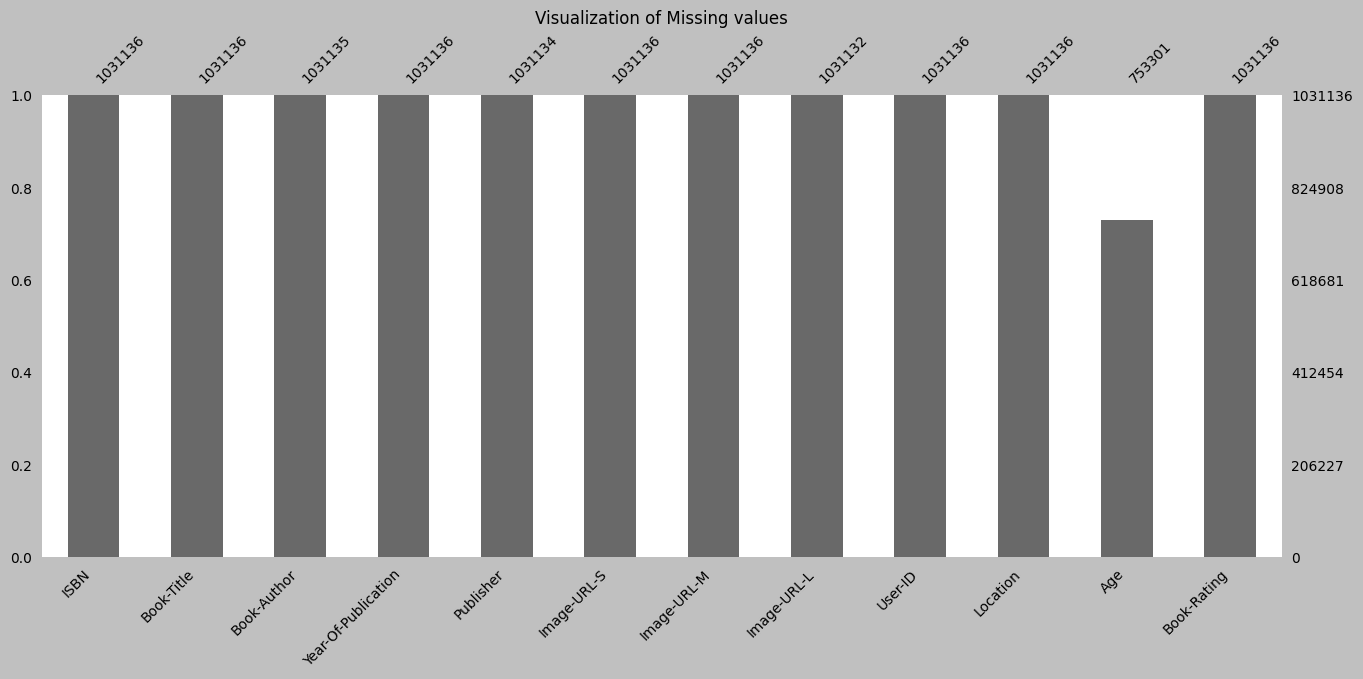

In [13]:
# Visualizing the missing values
plt.figure(facecolor = 'silver')
msno.bar(full_df, color ='dimgray', figsize= (16,6), fontsize= 10)
plt.title("Visualization of Missing values")
plt.plot()
plt.show()

### What did you know about your dataset?

From the above analysis i got to know the following terms of the dataset.

*   Dataset contains 1031136 rows and 12 columns.
*   In this dataset there is no duplicate records present.
*   In age column there is total 277835 missing values present.





## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
columns = list(full_df.columns)
columns

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L',
 'User-ID',
 'Location',
 'Age',
 'Book-Rating']

In [15]:
# Dataset Describe
full_df.describe()

,User-ID,Age,Book-Rating
count,1.031136e+06,753301.000000,1.031136e+06
mean,1.405945e+05,37.397648,2.839051e+00
std,8.052466e+04,14.098254,3.854157e+00
min,2.000000e+00,0.000000,0.000000e+00
25%,7.041500e+04,28.000000,0.000000e+00
50%,1.412100e+05,35.000000,0.000000e+00
75%,2.114260e+05,45.000000,7.000000e+00
max,2.788540e+05,244.000000,1.000000e+01


### Variables Description

*  **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.


*  **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

*   **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variables
full_df.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       202
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Location                22480
Age                       141
Book-Rating                11
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
full_df.rename(columns={'Book-Title': 'Book_Title','Book-Author':'Book_Author', 'Year-Of-Publication':'Year_Of_Publication','User-ID':'User_ID','Book-Rating':'Book_Rating'}, inplace = True)

In [18]:
# dataset without containing image links
df = full_df.drop(columns = ['Image-URL-S','Image-URL-M','Image-URL-L','Location'])

In [19]:
# replacing int(0) in year_of_publication column
df['Year_Of_Publication'] = df['Year_Of_Publication'].replace('DK Publishing Inc', int(0))
df['Year_Of_Publication'] = df['Year_Of_Publication'].replace('Gallimard', int(0))

In [20]:
# changing datatype into int
df['Year_Of_Publication'] = df['Year_Of_Publication'].astype(int)

In [21]:
# Replacing NAN or missing values with the mean value of age column
df['Age'] = df['Age'].replace(np.nan,int(0))

In [22]:
# changing datatype into int
df['Age'] = df['Age'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book_Title           1031136 non-null  object
 2   Book_Author          1031135 non-null  object
 3   Year_Of_Publication  1031136 non-null  int64 
 4   Publisher            1031134 non-null  object
 5   User_ID              1031136 non-null  int64 
 6   Age                  1031136 non-null  int64 
 7   Book_Rating          1031136 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 70.8+ MB


### What all manipulations have you done and insights you found?

In the Data Wrangling i have changed some of the column names according to my convenience and dropped some columns from the dataset which are not required right now like images and location. also remove some unrelevant values from the year_of_publication column. and after that change the datatype of variables. we also need to remove outliers and handling missing values in this dataset we will do this steps in data pre-processing. but for now i have changed null or missing values with int(0).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

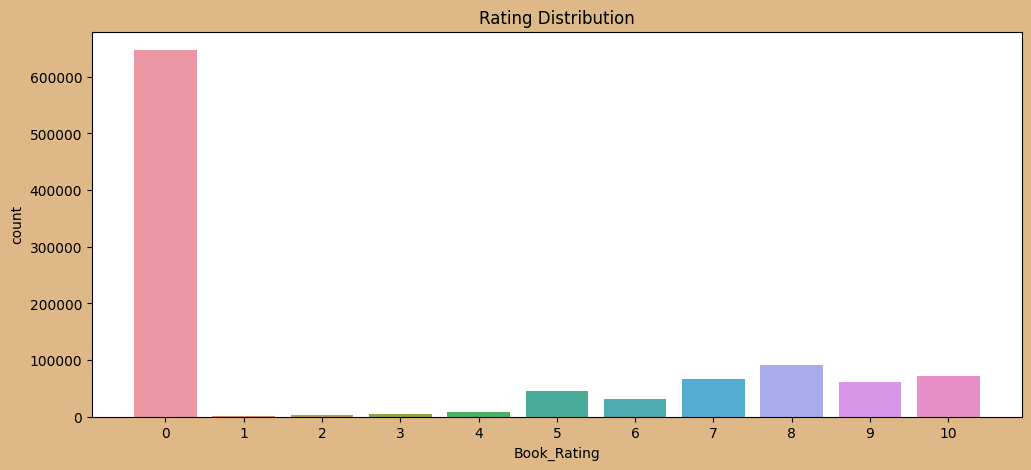

In [24]:
# ploting countplot for distribution of Rating
plt.figure(figsize =(12,5), facecolor = 'burlywood')
sns.countplot(data = df , x = 'Book_Rating')
plt.title('Rating Distribution')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the distribution of Rating Column that's why i pick the coutplot chart for Visualization.

##### 2. What is/are the insight(s) found from the chart?

From the plotted countplot i can say that the count of '0' is high as compare to other rating categories and except '0' the count of rating '8' is higher than others. and rating '1' has very less count as compare to other rating categories. so basically from the plotted countplot we can conclude that there is 0 rating count is higher as compare to other rating categories. it might be lead to the no rating for the book or less rating. so this kind of insights we got from the above plotted graph.

#### Chart - 2

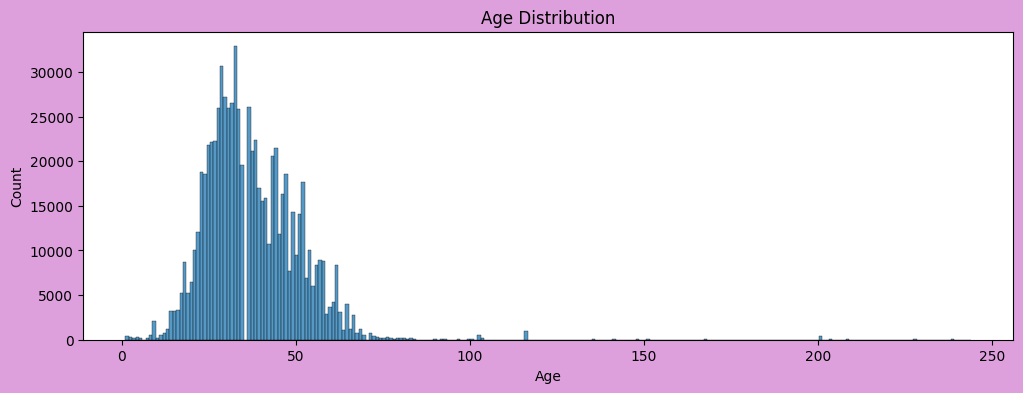

In [25]:
# Age Distribution using displot
age_columns = df[df['Age']!= 0]['Age']
plt.figure(figsize = (12,4), facecolor = 'plum')
sns.histplot(x = age_columns, bins = 250)
plt.title("Age Distribution")
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the age distribution in the form of visualization that's why i use histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above ploted histplot we can say that there are lot of incorrect values present in the age column. because age must be less than 100. but in our dataset most of the values exceds 100. and from the above graph we can say that the age between 10 to 50 has high counts in our dataset. when we will do the data processing and feature enginnering we will remove age column because it does not contain accurate values and most of the values are null in the age column.

#### Chart - 3

In [121]:
# Calculating the top 10 highest rating books
top_10 = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].sum()).sort_values('Book_Rating', ascending = False).head(10)

In [125]:
top_10.reset_index(inplace = True)

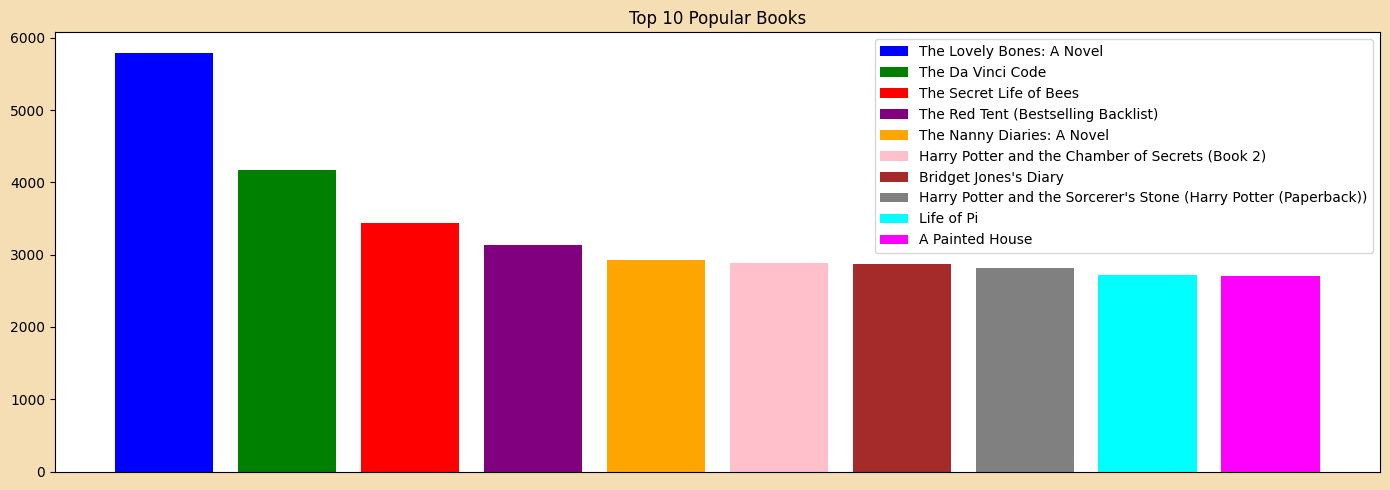

In [157]:
# top 10 Books that has higher rating
plt.figure(figsize =(14,5), facecolor = 'wheat')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(top_10['Book_Title'], top_10['Book_Rating'], label = top_10['Book_Title'], color = colors)
plt.xticks([])
plt.title('Top 10 Popular Books')
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the popular books (Top 10 boos) which having highest rating that's why i use this specific barchart.

##### 2. What is/are the insight(s) found from the chart?

 From the above ploted bargraph i found which top 10 books has highest rating.
 the foloowing books has highest rating.
 * The Lovely Bones: A Novel
 * The Da Vinci Code
 * The Secret Life of Bees
 * The Red Tent (Bestselling Backlist)
 * The Nanny Diaries: A Novel
 * Harry Potter and the Chamber of Secrets (Book 2)
 * Bridget Jones's Diary
 * Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
 * Life of Pi
 * A Painted House



#### Chart - 4

In [28]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [29]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [30]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [31]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [32]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [33]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [34]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [35]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [36]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [37]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [38]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [39]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [44]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [45]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [46]:
# Expand Contraction

#### 2. Lower Casing

In [47]:
# Lower Casing

#### 3. Removing Punctuations

In [48]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Remove Stopwords

In [51]:
# Remove White spaces

#### 6. Rephrase Text

In [52]:
# Rephrase Text

#### 7. Tokenization

In [53]:
# Tokenization

#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [55]:
# POS Taging

#### 10. Text Vectorization

In [56]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [59]:
# Transform Your data

### 6. Data Scaling

In [60]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [61]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [62]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [63]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [64]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [69]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [72]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [73]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***